# Language metrics

## Introduction

Language metrics are crucial in the field of Natural Language Processing (NLP) for measuring the similarity and differences between strings of text. One such metric is the Levenshtein distance, which calculates the minimum number of single-character edits (insertions, deletions, or substitutions) required to change one word into another.

## Levenshtein distance

In this context, the Levenshtein distance is calculated based on tokens (which could be words, subwords, or other meaningful units) instead of individual characters.

### Basic Example: Token-Based Levenshtein Distance

Let's begin with a simple token-based example, using whitespace as a basic tokenizer.

In [1]:
from trustyai.metrics.distance import levenshtein

A = "kitten sitting"
B = "sitting kitten"

d = levenshtein(A, B)

In [2]:
d.distance

2

In [3]:
print(f"Substitutions: {d.counters.substitutions}")
print(f"Deletions: {d.counters.deletions}")
print(f"Insertions: {d.counters.insertions}")
print(f"Correct: {d.counters.correct}")

Substitutions: 2
Deletions: 0
Insertions: 0
Correct: 0


In [4]:
d.matrix

array([[1., 1.],
       [1., 2.]])

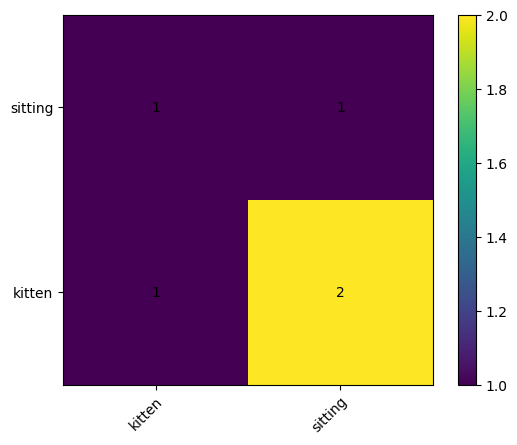

In [5]:
d.plot()

### Complex Example: Custom Tokenizer

For more complex examples, especially relevant to LLMs, we might need a tokenizer that goes beyond simple whitespace separation. 
Let's create an alternate tokenizer and use it for our Levenshtein distance comparison.

In [6]:
def custom_tokenizer(text):
    # Tokenize based on punctuation and whitespace
    import re
    tokens = re.findall(r'\b\w+\b|\S', text)
    return tokens

# Examples
A = "Renewable energy sources are essential for sustainable development."
B = "Sustainable development necessitates the use of renewable energy sources."

# Compute and print token-based Levenshtein distance
d = levenshtein(A, B, tokenizer=custom_tokenizer)

In [7]:
print(custom_tokenizer(A))
print(custom_tokenizer(B))

['Renewable', 'energy', 'sources', 'are', 'essential', 'for', 'sustainable', 'development', '.']
['Sustainable', 'development', 'necessitates', 'the', 'use', 'of', 'renewable', 'energy', 'sources', '.']


In [8]:
d.distance

9

In [9]:
print(f"Substitutions: {d.counters.substitutions}")
print(f"Deletions: {d.counters.deletions}")
print(f"Insertions: {d.counters.insertions}")
print(f"Correct: {d.counters.correct}")

Substitutions: 8
Deletions: 0
Insertions: 1
Correct: 1


In [10]:
d.matrix

array([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 2.,  2.,  3.,  4.,  5.,  6.,  7.,  7.,  8.,  9.],
       [ 3.,  3.,  3.,  4.,  5.,  6.,  7.,  8.,  7.,  8.],
       [ 4.,  4.,  4.,  4.,  5.,  6.,  7.,  8.,  8.,  8.],
       [ 5.,  5.,  5.,  5.,  5.,  6.,  7.,  8.,  9.,  9.],
       [ 6.,  6.,  6.,  6.,  6.,  6.,  7.,  8.,  9., 10.],
       [ 7.,  7.,  7.,  7.,  7.,  7.,  7.,  8.,  9., 10.],
       [ 8.,  7.,  8.,  8.,  8.,  8.,  8.,  8.,  9., 10.],
       [ 9.,  8.,  8.,  9.,  9.,  9.,  9.,  9.,  9.,  9.]])

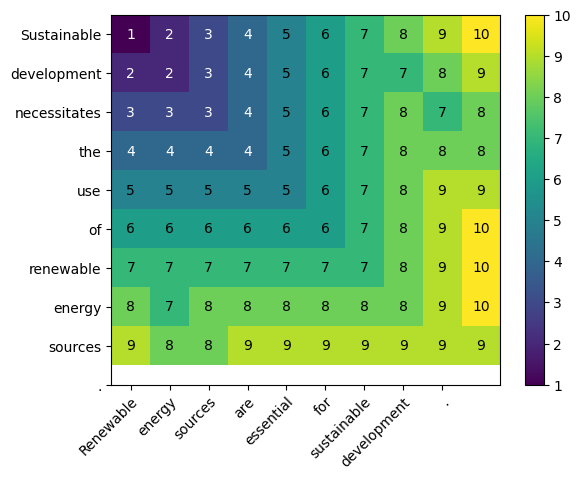

In [11]:
d.plot()